**Example 1 (XGBoost Classifier): Breast Cancer Dataset**

- let's get into the examples for the advanced boosting algorithms: XGBoost, LightGBM, and CatBoost.
- We'll do two examples for each (one classification, one regression).

**Important Note on Installation:**
Before running these examples, you might need to install these libraries if you haven't already. You can typically install them using pip:

- pip install xgboost
- pip install lightgbm
- pip install catboost

#### A. XGBoost Examples (XGBClassifier & XGBRegressor)

- XGBoost (Extreme Gradient Boosting) is known for its performance and rich feature set.

**Example 1 (XGBoost Classifier): Breast Cancer Dataset**

In [3]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 5.5 MB/s eta 0:00:28
    --------------------------------------- 2.1/150.0 MB 6.0 MB/s eta 0:00:25
    --------------------------------------- 3.4/150.0 MB 6.2 MB/s eta 0:00:24
   - -------------------------------------- 5.0/150.0 MB 6.3 MB/s eta 0:00:23
   - -------------------------------------- 6.3/150.0 MB 6.4 MB/s eta 0:00:23
   -- ------------------------------------- 7.6/150.0 MB 6.5 MB/s eta 0:00:23
   -- ------------------------------------- 8.9/150.0 MB 6.4 MB/s eta 0:00:22
   -- ------------------------------------- 10.5/150.0 MB 6.5 MB/s eta 0:00:22
   --- ------------------------------------ 11.8/150.0 MB 6.5 MB/s eta 0:00:22
   --- ------------------------------------ 13.1/150.0 MB 6.5 MB/s eta 0:00:22
   --- ------------------------------------ 14.7/150.0 MB 6.5 MB/s eta 0:00:21
   ---- ----------------------------------- 16.0/150.0 MB 6.5 MB/s 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import xgboost as xgb # Import XGBoost
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# --- 1. Load Breast Cancer Dataset ---
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

X_df = pd.DataFrame(X, columns=feature_names)
print("Breast Cancer Dataset Loaded for XGBoost Classifier.")
print(f"Features shape: {X_df.shape}, Target shape: {y.shape}")

Breast Cancer Dataset Loaded for XGBoost Classifier.
Features shape: (569, 30), Target shape: (569,)


In [12]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42, stratify=y
)
# Note: XGBoost can handle numerical data directly; scaling is not strictly required but can sometimes help.


In [13]:
# --- 3. Instantiate and Train XGBoost Classifier ---
# This section defines and trains 'xgb_clf'. It MUST be run before section 5.
print("\n--- XGBoost Classifier (Breast Cancer Dataset) ---")
# Key XGBClassifier parameters:
#   n_estimators: Number of boosting rounds (trees).
#   learning_rate (eta): Step size shrinkage.
#   max_depth: Maximum depth of a tree.
#   subsample: Subsample ratio of the training instances.
#   colsample_bytree: Subsample ratio of columns when constructing each tree.
#   gamma (min_split_loss): Minimum loss reduction required to make a further partition.
#   reg_alpha (alpha): L1 regularization term on weights.
#   reg_lambda (lambda): L2 regularization term on weights.
#   objective: 'binary:logistic' for binary classification.
#   use_label_encoder=False and eval_metric='logloss' are often recommended to avoid warnings with newer XGBoost.

xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    use_label_encoder=False, # Suppress a warning in newer versions
    eval_metric='logloss',   # Suppress a warning / specify metric
    random_state=42,
    n_jobs=-1
)
xgb_clf.fit(X_train, y_train) # The model is trained here



--- XGBoost Classifier (Breast Cancer Dataset) ---


G:\learning\Machine_learning\Pandas\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:16:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)


XGBoost Classifier Test Accuracy: 0.9649

Confusion Matrix (XGBoost Classifier):


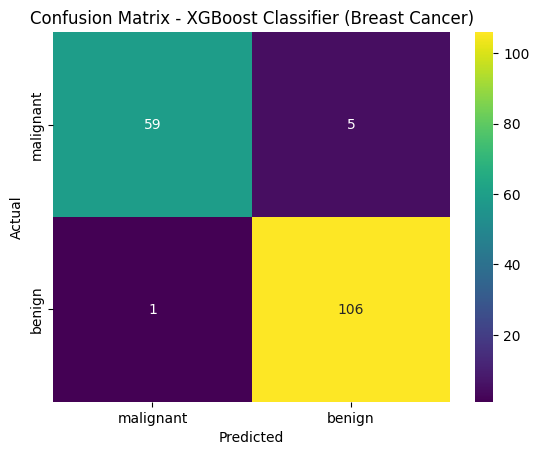


Classification Report (XGBoost Classifier):
              precision    recall  f1-score   support

   malignant       0.98      0.92      0.95        64
      benign       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [14]:
# --- 4. Make Predictions and Evaluate ---
y_pred_xgb_clf = xgb_clf.predict(X_test)
y_pred_proba_xgb_clf = xgb_clf.predict_proba(X_test)[:, 1] # Probability of class 1
accuracy_xgb_clf = accuracy_score(y_test, y_pred_xgb_clf)

print(f"\nXGBoost Classifier Test Accuracy: {accuracy_xgb_clf:.4f}")

print("\nConfusion Matrix (XGBoost Classifier):")
cm_xgb_clf = confusion_matrix(y_test, y_pred_xgb_clf)
sns.heatmap(cm_xgb_clf, annot=True, fmt="d", cmap="viridis", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost Classifier (Breast Cancer)")
plt.show()

print("\nClassification Report (XGBoost Classifier):")
print(classification_report(y_test, y_pred_xgb_clf, target_names=target_names))



--- Feature Importances ---

Feature Importances from XGBoost Classifier:
                 feature  importance
20          worst radius    0.298461
7    mean concave points    0.182632
27  worst concave points    0.097932
23            worst area    0.084290
0            mean radius    0.075819


C:\Users\king\AppData\Local\Temp\ipykernel_12240\671445769.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df_xgb.head(10), palette="crest") # Top 10


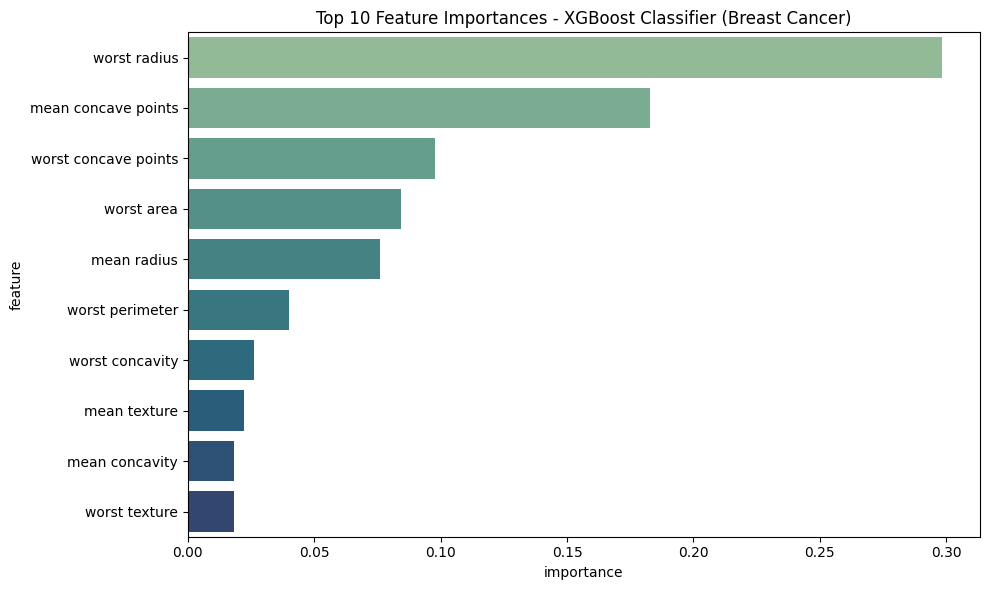

In [15]:
# --- 5. Feature Importances (Optional) ---
# IMPORTANT: Ensure that section 3 (model training) has been executed in the current session
# before running this section, otherwise 'xgb_clf' will not be defined.
print("\n--- Feature Importances ---")
if 'xgb_clf' in locals() or 'xgb_clf' in globals(): # Check if model exists
    importances_xgb = xgb_clf.feature_importances_
    feature_importance_df_xgb = pd.DataFrame({
        'feature': feature_names,
        'importance': importances_xgb
    }).sort_values('importance', ascending=False)

    print("\nFeature Importances from XGBoost Classifier:")
    print(feature_importance_df_xgb.head()) # Print top features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df_xgb.head(10), palette="crest") # Top 10
    plt.title('Top 10 Feature Importances - XGBoost Classifier (Breast Cancer)')
    plt.tight_layout()
    plt.show()

    # Alternative way to plot importances using XGBoost's built-in function:
    # fig, ax = plt.subplots(figsize=(10, 8))
    # xgb.plot_importance(xgb_clf, ax=ax, max_num_features=10, height=0.8)
    # plt.title("XGBoost Feature Importance (Built-in Plot)")
    # plt.tight_layout()
    # plt.show()
else:
    print("Model 'xgb_clf' not found. Please train the model in section 3 first.")


---


**Example 2 (XGBoost Regressor): California Housing Dataset**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import xgboost as xgb # Import XGBoost
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Load California Housing Dataset ---
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

X_df = pd.DataFrame(X, columns=feature_names)
print("California Housing Dataset Loaded for XGBoost Regressor.")


California Housing Dataset Loaded for XGBoost Regressor.


In [3]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42
)

In [4]:
# --- 3. Instantiate and Train XGBoost Regressor ---
print("\n--- XGBoost Regressor (California Housing Dataset) ---")
# Key XGBRegressor parameters are similar to XGBClassifier,
# but with objective typically 'reg:squarederror'.
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,         # Can be a bit deeper for regression
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror', # Objective for regression
    random_state=42,
    n_jobs=-1
)
xgb_reg.fit(X_train, y_train)



--- XGBoost Regressor (California Housing Dataset) ---


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [6]:
# --- 4. Make Predictions and Evaluate ---
y_pred_xgb_reg = xgb_reg.predict(X_test)
mse_xgb_reg = mean_squared_error(y_test, y_pred_xgb_reg)
r2_xgb_reg = r2_score(y_test, y_pred_xgb_reg)

print(f"\nXGBoost Regressor Test MSE: {mse_xgb_reg:.4f}")
print(f"XGBoost Regressor Test R2 Score: {r2_xgb_reg:.4f}")


XGBoost Regressor Test MSE: 0.2297
XGBoost Regressor Test R2 Score: 0.8250


In [7]:
# --- 5. Feature Importances (Optional) ---
importances_xgb_reg = xgb_reg.feature_importances_
feature_importance_df_xgb_reg = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_xgb_reg
}).sort_values('importance', ascending=False)

print("\nFeature Importances from XGBoost Regressor:")
print(feature_importance_df_xgb_reg.head())


Feature Importances from XGBoost Regressor:
     feature  importance
0     MedInc    0.520620
5   AveOccup    0.125040
7  Longitude    0.093871
2   AveRooms    0.080502
6   Latitude    0.072197


C:\Users\king\AppData\Local\Temp\ipykernel_9792\1427469875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df_xgb_reg.head(10), palette="rocket")


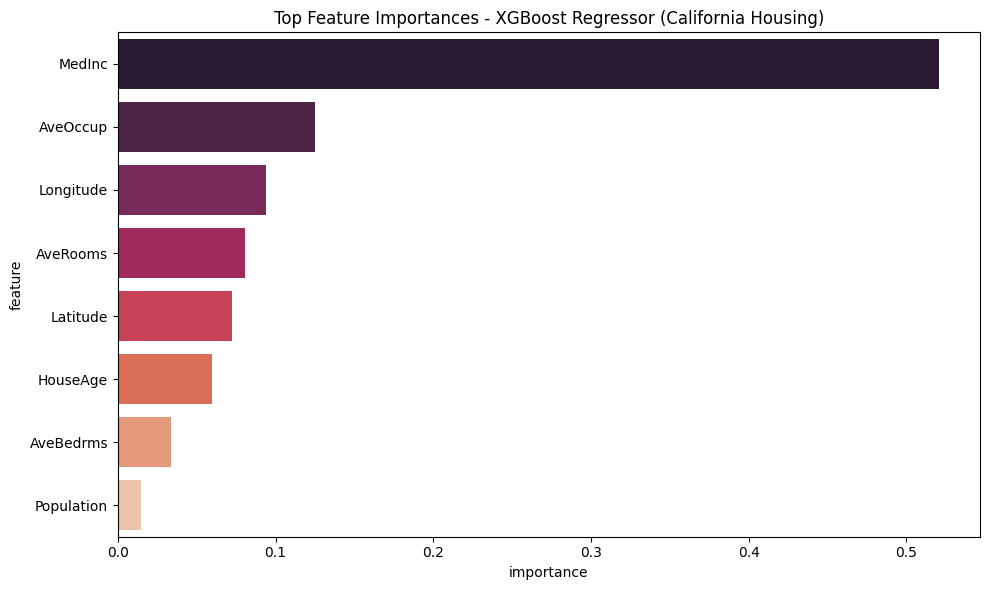

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df_xgb_reg.head(10), palette="rocket")
plt.title('Top Feature Importances - XGBoost Regressor (California Housing)')
plt.tight_layout()
plt.show()

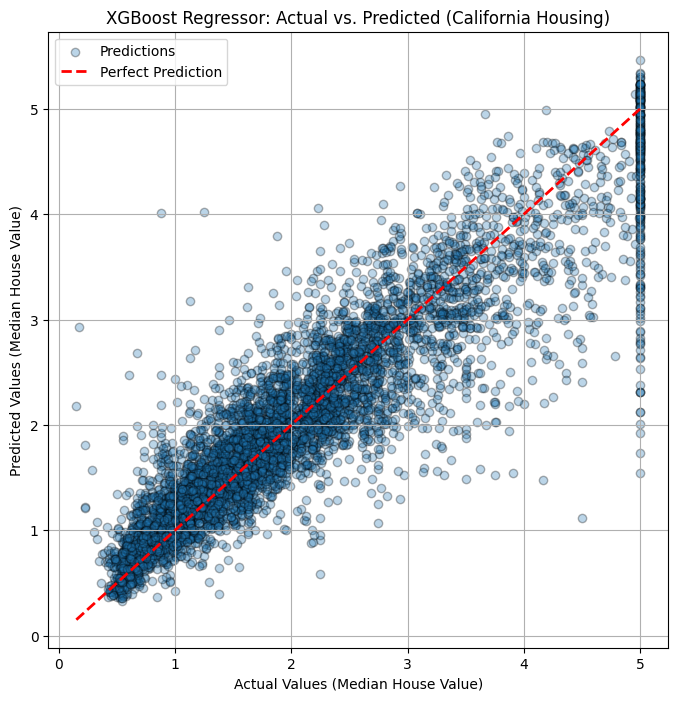

In [9]:
# --- 6. Plot Actual vs. Predicted Values ---
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_xgb_reg, alpha=0.3, edgecolors='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Values (Median House Value)")
plt.ylabel("Predicted Values (Median House Value)")
plt.title("XGBoost Regressor: Actual vs. Predicted (California Housing)")
plt.legend()
plt.grid(True)
plt.show()
